In [31]:
# programmer - Sophia Quinton
# date - 11-3-21
# class - DSC -540
# assignment - Assignment 1

#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Part1 - Tools Readiness
##file from (Larose & Larose, 2019)
##pandas
frame = pd.read_csv("E:/GCU/Graduate Classes/DSC - 540 Machine Learning/Week 1/cereals.csv")
frame.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [3]:
##numpy
rounded_rating = np.round(frame['Rating'][0], 3)
rounded_rating

68.403

{'whiskers': [<matplotlib.lines.Line2D at 0x20c3812e5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c3812ec40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c3812e190>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3813e3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3813e730>],
 'means': []}

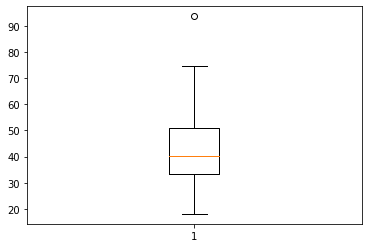

In [4]:
##matplotlib
plt.boxplot(frame['Rating'])

In [5]:
##scikit-learn
frame_train, frame_test = train_test_split(frame, test_size=0.2, random_state=25)
frame_train.head()
print(len(frame_train))
print(len(frame_test))

61
16


In [6]:
#Part2 - Review Predictive Models and Python Proficiency
##read in data
estate = pd.read_csv("E:/GCU/Graduate Classes/DSC - 540 Machine Learning/Week 1/housing.csv")
estate.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


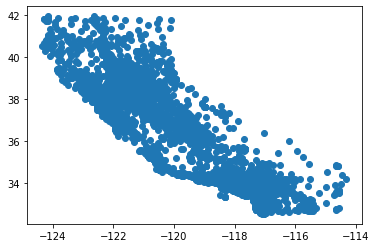

In [7]:
## view data
plt.scatter(estate['longitude'], estate['latitude'])
plt.show()

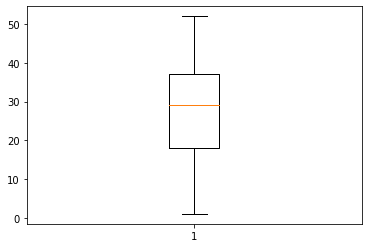

In [21]:
plt.boxplot(estate['housing_median_age'])
plt.show()

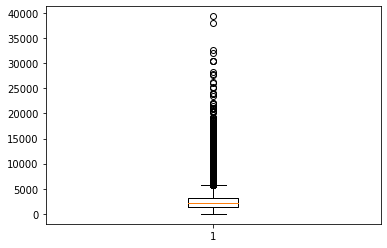

In [22]:
plt.boxplot(estate['total_rooms'])
plt.show()

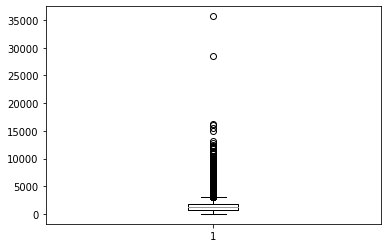

In [23]:
plt.boxplot(estate['population'])
plt.show()

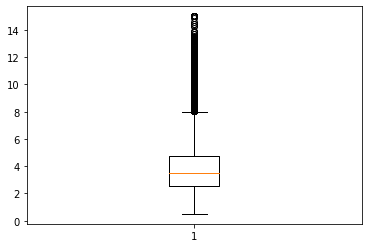

In [24]:
plt.boxplot(estate['median_income'])
plt.show()

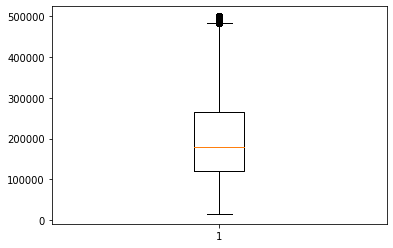

In [25]:
plt.boxplot(estate['median_house_value'])
plt.show()

In [14]:
##split data
estate_train, estate_test = train_test_split(estate, test_size=0.2, random_state=25)

In [15]:
##prepare data (GeeksforGeeks, 2020)
test_columns = estate[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
vif = pd.DataFrame()
vif["variable"] = test_columns.columns
vif["VIF"] = [variance_inflation_factor(test_columns.values,i) for i in range(test_columns.shape[1])]
vif

,variable,VIF
0,longitude,592.503040
1,latitude,538.400848
2,housing_median_age,7.238474
3,total_rooms,11.505213
4,population,11.408182
5,median_income,6.264782


In [16]:
##do PCA Analysis
x_estate_train = estate_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
x_estate_test = estate_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
y_estate_train = estate_train['median_house_value']
y_estate_test = estate_test['median_house_value']

scaler = StandardScaler()
scaler.fit(x_estate_train)
x_estate_train = scaler.transform(x_estate_train)
x_estate_test = scaler.transform(x_estate_test)

In [17]:
pca = PCA(0.95)
pca.fit(x_estate_train)
x_estate_train = pca.transform(x_estate_train)
x_estate_test = pca.transform(x_estate_test)

In [39]:
##run model (Larose & Larose, 2019)
constantX = sm.add_constant(x_estate_train, prepend=True)
estate_model = sm.OLS(y_estate_train, constantX).fit()
estate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     4619.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:11:37   Log-Likelihood:            -2.0975e+05
No. Observations:               16512   AIC:                         4.195e+05
Df Residuals:                   16507   BIC:                         4.196e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.066e+05    619.105    333.762      0.000    2.05e+05    2.08e+05
x1          7677.6593    418.833     18.331      0.000    6856.701    8498.617
x2           934.7505    458.486      2.039      0.041      36.068    1833.433
x3         -7.378e+04    615.501   -119.877      0.000    -7.5e+04   -7.26e+04
x4          4.268e+04    695.343     61.375      0.000    4.13e+04     4.4e+04
==============================================================================
Omnibus:                     3482.398   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8769.875
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                       5.718   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

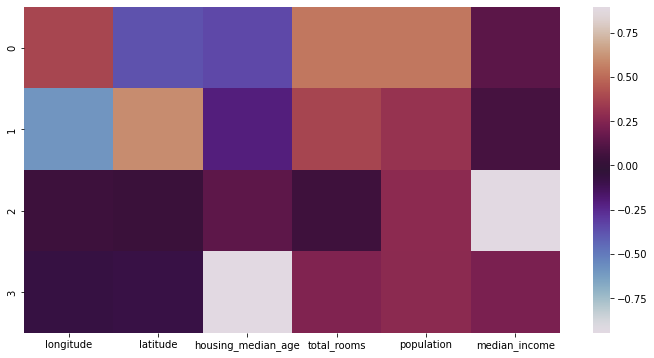

In [36]:
##(DataScience+, nd)
map= pd.DataFrame(pca.components_,columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

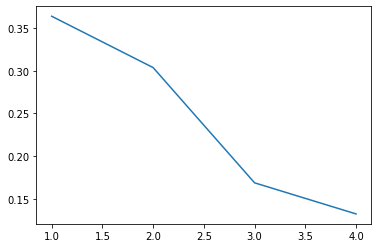

In [37]:
##scree plot (Zach, 2021)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.show()

In [19]:
##validate data (Larose & Larose, 2019)
constantX_test = sm.add_constant(x_estate_test, prepend=True)
estate_model_test= sm.OLS(y_estate_test, constantX_test).fit()
estate_model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1149.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:06:16   Log-Likelihood:                -52369.
No. Observations:                4128   AIC:                         1.047e+05
Df Residuals:                    4123   BIC:                         1.048e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.092e+05   1218.673    171.633      0.000    2.07e+05    2.12e+05
x1          7460.1512    790.853      9.433      0.000    5909.652    9010.650
x2          -205.8746    893.178     -0.230      0.818   -1956.985    1545.235
x3         -7.419e+04   1231.663    -60.240      0.000   -7.66e+04   -7.18e+04
x4          4.184e+04   1351.925     30.947      0.000    3.92e+04    4.45e+04
==============================================================================
Omnibus:                      809.222   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1785.669
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       5.310   Cond. No.                         1.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ypred = estate_model.predict(constantX_test)
##MAE (Larose & Larose, 2019)
print("Model MAE: ", metrics.mean_absolute_error(y_true = y_estate_test, y_pred = ypred))
print("base MAE: ", np.sqrt(metrics.mean_squared_error(y_true = y_estate_test, y_pred = ypred)))

Model MAE:  58203.1309674163
base MAE:  78282.93963949986


In [40]:
# calculate s or standard deviation (Larose & Larose, 2019)
print("test MSE", np.sqrt(estate_model_test.scale))
print("Model MSE", np.sqrt(estate_model.scale))


test MSE 78268.50127486532
Model MSE 79554.41649151935
